In [1]:
import pandas as pd

In [145]:
df = pd.read_csv("bankloans.csv")

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## Steps:
    - EDA
    - Train Test split
    - Outlier treatment
    - Missing value treatment
    - Scaling and encoding of data
    - Fit and predict with decision trees

In [7]:
## Missing values 

df.isna().sum()/len(df)

age         0.000000
ed          0.000000
employ      0.000000
address     0.000000
income      0.000000
debtinc     0.000000
creddebt    0.000000
othdebt     0.000000
default     0.176471
dtype: float64

In [9]:
df = df.dropna()
df.isna().sum()/len(df)


age         0.0
ed          0.0
employ      0.0
address     0.0
income      0.0
debtinc     0.0
creddebt    0.0
othdebt     0.0
default     0.0
dtype: float64

In [11]:
df["default"].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

## Handle the imbalanced dataset using undersampling or oversampling

## train test split of the data

In [12]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [13]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [14]:
features = ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt']
target = "default"

In [17]:
len(df)

700

In [16]:
X = df[features]
y = df[target]
X.shape, y.shape

((700, 8), (700,))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33)
print(X_train.shape, X_test.shape)

(469, 8) (231, 8)


## Scaling and encoding of the data
    - Needed for distance based algorithms
    - Not needed for Decision trees

In [21]:
from sklearn.preprocessing import StandardScaler

    - Always use the parameters from the train data to scale the test data to prevent data leakage

In [24]:
std = StandardScaler()
std.fit(X_train)   ## calculates the mean and standard deviation from the train data
std.transform(X_train) ## scales the train data based on the mean, std of the train data
std.transform(X_test) ## ## scales the test data based on the mean, std of the train data

array([[ 1.885496  ,  1.42198201,  0.22316904, ...,  0.30406697,
         0.42798828,  1.39140536],
       [ 0.00694277, -0.77179945,  0.07719097, ..., -0.75972639,
        -0.5406419 , -0.54739332],
       [ 1.13407471,  0.32509128,  1.82892787, ...,  0.45181605,
         0.75981826,  2.83219134],
       ...,
       [ 0.75836406,  0.32509128, -0.65269941, ...,  1.33831052,
        -0.04040047,  0.1715897 ],
       [ 0.00694277, -0.77179945, -0.21476519, ...,  0.88028838,
         0.06616402,  0.51468912],
       [ 0.38265342, -0.77179945, -0.65269941, ...,  0.51091568,
        -0.14611932, -0.53561802]])

## Fitting the model

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import  DecisionTreeClassifier

In [30]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
test_preds = dt_clf.predict(X_test)
train_preds = dt_clf.predict(X_train)
train_acc = accuracy_score(train_preds, y_train)
test_acc = accuracy_score(test_preds, y_test)


print("Training Accuracy :", )
print("Testing Accuracy :", test_atrain_acccc)

In [33]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_preds, y_train)
test_acc = accuracy_score(test_preds, y_test)


print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy : 1.0
Testing Accuracy : 0.7272727272727273


    - Model is overfitting on the training data

In [66]:
def show_accuracy(model, X_train = X_train, y_train= y_train, X_test = X_test, y_test= y_test):
    dt_clf.fit(X_train, y_train)
    test_preds = dt_clf.predict(X_test)
    train_preds = dt_clf.predict(X_train)
    train_acc = accuracy_score(train_preds, y_train)
    test_acc = accuracy_score(test_preds, y_test)
    
    print("Training Accuracy :", train_acc.round(3))
    print("Testing Accuracy :", test_acc.round(3))
    print("Cross Validation Score: ",  cross_val_score(model,X_train, y_train, cv = 5 ).mean().round(2))

In [ ]:
def show_accuracy(model, X_train = X_train, y_train= y_train, X_test = X_test, y_test= y_test):
    # do the splitting here
    dt_clf.fit(X_train, y_train)
    test_preds = dt_clf.predict(X_test)
    train_preds = dt_clf.predict(X_train)
    train_acc = accuracy_score(train_preds, y_train)
    test_acc = accuracy_score(test_preds, y_test)
    
    print("Training Accuracy :", train_acc.round(3))
    print("Testing Accuracy :", test_acc.round(3))
    print("Cross Validation Score: ",  cross_val_score(model,X_train, y_train, cv = 5 ).mean().round())

In [67]:
model = DecisionTreeClassifier()
show_accuracy(model)

Training Accuracy : 1.0
Testing Accuracy : 0.697
Cross Validation Score:  0.72


## Implement Hyperparameter Tuning to handle overfitting

In [68]:
model = DecisionTreeClassifier( criterion="entropy"  )
show_accuracy(model)

Training Accuracy : 1.0
Testing Accuracy : 0.714
Cross Validation Score:  0.73


In [69]:
len(df)

700

In [62]:
model = DecisionTreeClassifier( max_depth=4,
                                min_samples_split=30,
                                min_samples_leaf=25  )

show_accuracy(model)

Training Accuracy : 1.0
Testing Accuracy : 0.723
Cross Validation Score:  0.76


## Cross Validatiion Score

In [55]:
cross_val_score(model,X, y ).mean()

0.7614285714285713

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc  = RandomForestClassifier(n_estimators=8, max_depth=5)
rfc.fit(X_train, y_train)
show_accuracy(rfc)

Training Accuracy : 1.0
Testing Accuracy : 0.693
Cross Validation Score:  0.78


## Find the best set of parameters using GRIDSEARCHCV

In [95]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model = RandomForestClassifier()
param_grid = {
    "n_estimators":[3,4,5,6,7,8],
    "max_depth":[2,3,4,5,6,7,8,9,10,12,15,20], ## 12 * 6 = 72 combination
}

clf_grid = GridSearchCV(model, param_grid=param_grid, cv = 10)  # 72 combinations with 10 cv = 720 models
clf_grid.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20],
                         'n_estimators': [3, 4, 5, 6, 7, 8]})

In [96]:
clf_grid.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=7)

In [97]:
clf_grid.best_score_

0.7957142857142856

In [99]:
pd.DataFrame(clf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004003,0.001547,0.001017,0.000386,2,3,"{'max_depth': 2, 'n_estimators': 3}",0.771429,0.728571,0.685714,0.742857,0.742857,0.757143,0.757143,0.742857,0.771429,0.714286,0.741429,0.025112,71
1,0.003265,0.000350,0.000702,0.000128,2,4,"{'max_depth': 2, 'n_estimators': 4}",0.728571,0.757143,0.742857,0.757143,0.800000,0.800000,0.757143,0.771429,0.757143,0.742857,0.761429,0.022177,46
2,0.003111,0.000089,0.000601,0.000078,2,5,"{'max_depth': 2, 'n_estimators': 5}",0.742857,0.714286,0.728571,0.728571,0.771429,0.742857,0.757143,0.771429,0.814286,0.771429,0.754286,0.027701,59
3,0.003575,0.000079,0.000602,0.000018,2,6,"{'max_depth': 2, 'n_estimators': 6}",0.728571,0.742857,0.728571,0.785714,0.757143,0.757143,0.757143,0.800000,0.771429,0.757143,0.758571,0.021618,51
4,0.004005,0.000056,0.000619,0.000015,2,7,"{'max_depth': 2, 'n_estimators': 7}",0.728571,0.757143,0.714286,0.742857,0.771429,0.742857,0.742857,0.771429,0.800000,0.757143,0.752857,0.023079,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.003397,0.000048,0.000565,0.000005,20,4,"{'max_depth': 20, 'n_estimators': 4}",0.714286,0.728571,0.671429,0.785714,0.785714,0.714286,0.742857,0.728571,0.857143,0.742857,0.747143,0.048676,66
68,0.004205,0.000157,0.000699,0.000133,20,5,"{'max_depth': 20, 'n_estimators': 5}",0.728571,0.714286,0.742857,0.714286,0.671429,0.814286,0.814286,0.728571,0.814286,0.728571,0.747143,0.047402,66
69,0.005172,0.000344,0.000682,0.000080,20,6,"{'max_depth': 20, 'n_estimators': 6}",0.771429,0.700000,0.757143,0.742857,0.828571,0.728571,0.742857,0.800000,0.800000,0.728571,0.760000,0.037688,49
70,0.005842,0.000234,0.000751,0.000076,20,7,"{'max_depth': 20, 'n_estimators': 7}",0.728571,0.728571,0.771429,0.728571,0.828571,0.800000,0.814286,0.785714,0.785714,0.728571,0.770000,0.036950,25


In [100]:
final_model = clf_grid.best_estimator_

In [105]:
cross_val_score(final_model, X, y, cv = 5).mean()

0.7642857142857142

# Getting Feature importance 
    - using Decision tree
    - Using Random Forest

In [118]:
dt_clf.feature_names_in_

array(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'], dtype=object)

In [117]:
dt_clf.feature_importances_

array([0.13161103, 0.01655156, 0.19211369, 0.10990708, 0.09043843,
       0.17291196, 0.15491901, 0.13154725])

In [121]:
feature_importance_df = pd.DataFrame({
            "feature":  dt_clf.feature_names_in_,
            "importance": dt_clf.feature_importances_})

feature_importance_df = feature_importance_df.sort_values(by = "importance", ascending=False)
feature_importance_df

,feature,importance
2,employ,0.192114
5,debtinc,0.172912
6,creddebt,0.154919
0,age,0.131611
7,othdebt,0.131547
3,address,0.109907
4,income,0.090438
1,ed,0.016552


<AxesSubplot: >

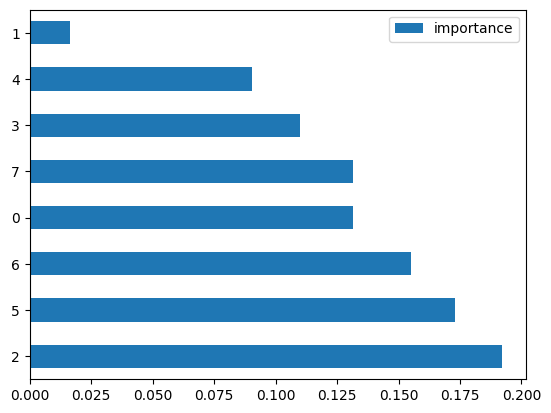

In [123]:
feature_importance_df.plot(kind = 'barh')

In [125]:
rfc.feature_importances_

array([0.08067698, 0.05960303, 0.23013572, 0.0500456 , 0.12686203,
       0.18192692, 0.12947589, 0.14127382])

# Visualizing the decision tree
    - graphviz
    - pydotplus
    - plot_tree

In [126]:
from sklearn import tree

In [138]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [141]:
dt_clf.feature_names_in_

array(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt'], dtype=object)

In [148]:
dt_clf.classes_

array([0., 1.])

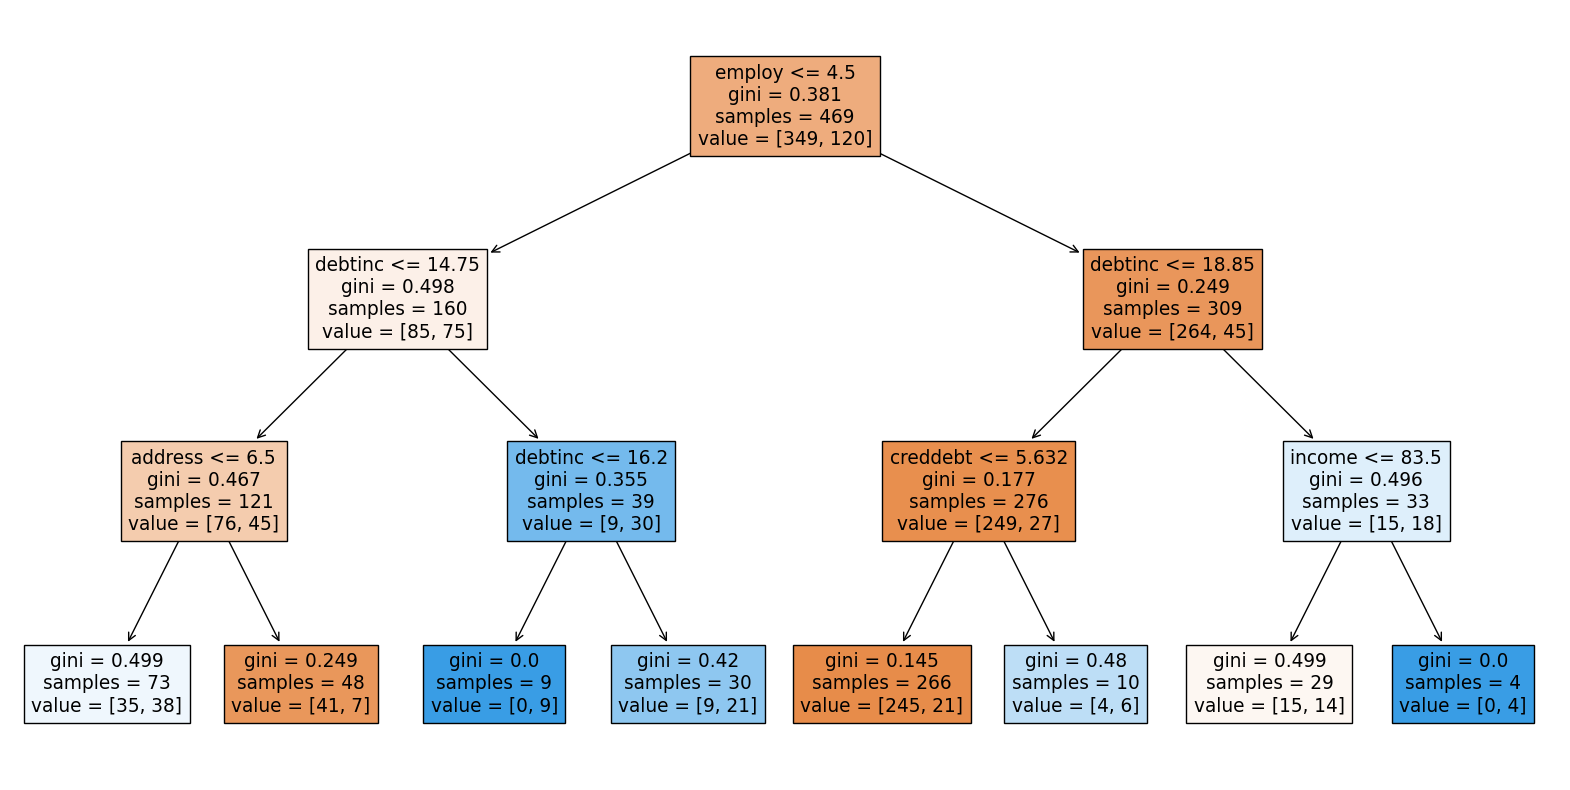

In [144]:
plt.figure(figsize=(20,10))
# %matplotlib qt
tree.plot_tree(dt_clf, filled = True, feature_names= dt_clf.feature_names_in_ )
plt.savefig("decision_tree_bankloans.png")
plt.show()

In [146]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [147]:
df[df["default"].isna()]

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


## Save this model
    - pickle the model to predict on the features later

In [149]:
import pickle

In [156]:
filename = "dt_clf_bankloans.pkl"
pickle.dump(dt_clf, open(filename, 'wb'))

In [162]:
pickle.load(open("dt_clf_bankloans.pkl","rb"))

DecisionTreeClassifier(max_depth=3)